# VQE of the Z2 lattice gauge theory

In [1]:
# The C2QA package is currently not published to PyPI.
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import c2qa
import qiskit
import numpy as np
import scipy
import itertools
import c2qa.util as util
import resource
import c2qa.stateReadout as stateReadout
import matplotlib.pyplot as plt
import matplotlib
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from collections import Counter

### Prepare initial state and act on it with H1, H2, H3

In [18]:
numberofqubits=2
numberofmodes=3
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

diffstallmodes=[2,2,2]
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(diffstallmodes[i], qmr[i])

for i in range(numberofqubits):
    circuit.h(qbr[i])

# stateop, _ = c2qa.util.simulate(circuit)
# occ=util.stateread(stateop, qbr.size, numberofmodes, cutoff)

theta_1=np.pi/2
theta_2=np.pi/2
theta_3=np.pi/2

for i in range(numberofmodes-1):
    resource.vary_Z2LGT(circuit, numberofmodes, qmr, qbr, theta_1, theta_2, theta_3)
    circuit.barrier()
    resource.measureE_hoppingterm(circuit, numberofmodes, numberofqubits, qmr, qbr, i)
    circuit.barrier()
    for i in range(numberofqubits):
        resource.measureE_fieldterm(circuit, qmr, qbr, i)
        circuit.barrier()

# circuit.draw(output='mpl', filename='VQE_resourceH_measureE1.png')
circuit.measure_all()
stateop, result = c2qa.util.simulate(circuit)
# util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  222  qubits:  00     with amplitude: 0.500 + i0.000
qumodes:  222  qubits:  01     with amplitude: 0.500 + i0.000
qumodes:  222  qubits:  10     with amplitude: 0.500 + i0.000
qumodes:  222  qubits:  11     with amplitude: 0.500 + i0.000
occupation modes  [2.0, 2.0, 2.0]
occupation qubits  [0.4999999999999999, 0.4999999999999999]
Counts(ideal): {'10101101 1': 10, '01101101 0': 10, '01011110 0': 41, '11110011 1': 41, '01111001 0': 55, '10011011 1': 34, '11001111 1': 10, '10100111 1': 21, '11011011 1': 17, '01001111 0': 10, '00011110 0': 24, '00101010 0': 5, '11101101 1': 17, '00001111 0': 26, '10111001 1': 35, '10001111 1': 31, '11100111 1': 34, '11101010 1': 7, '11011110 1': 33, '01110011 0': 51, '00110011 0': 32, '01101010 0': 10, '10101010 1': 8, '11111100 1': 5, '00011011 0': 23, '00110110 0': 30, '01011011 0': 29, '01100111 0': 41, '00111100 0': 23, '10110011 1': 29, '00111001 0': 38, '01111100 0': 3, '00100111 0': 28, '11111001 1': 58, '01110110 0': 32, '10111100 1': 36,

In [10]:
qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qbr = qiskit.QuantumRegister(size=1)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

circuit.cv_initialize(2, qmr[0])

circuit.x(qbr[0])

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
counts = result.get_counts()
util.cv_fockcounts(counts, (qmr[0],qbr[0]))

qumodes:  2  qubits:  1     with amplitude: 1.000 + i0.000
occupation modes  [2.0]
occupation qubits  [1.0]


IndexError: string index out of range

In [19]:
circuit.draw(output='mpl', filename='/home/richard/PycharmProjects/c2qa/c2qa-qiskit/tutorials/Z2-lattice-gauge-theory/images/VQE.png')

<Figure size 4531.29x3578.56 with 1 Axes>

# ECD protocol for creating the hopping term in H for VQE

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


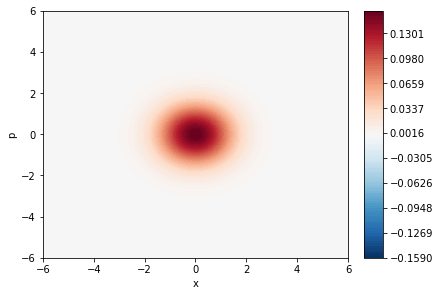

In [2]:
# The C2QA pacakge is currently not published to PyPI.
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

import c2qa
import qiskit
import numpy as np

# Augment the number of qubits per mode
qmr = c2qa.QumodeRegister(num_qumodes=2, num_qubits_per_qumode=2)
qbr = qiskit.QuantumRegister(size=1)
qc = c2qa.CVCircuit(qmr, qbr)

# Initialize your qubit (should have no effect on Fock state Wigner function)
qc.initialize([1,0], qbr[0])

# initialise in x (just h) or y eigenstate
qc.h(qbr[0])
qc.rz(np.pi/2,qbr[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
qc.cv_initialize(0, qmr[0])
qc.cv_initialize(0, qmr[1])

qc.cv_rh1(1, qmr[0], qmr[1], qbr[0])

state, _ = c2qa.util.simulate(qc)
c2qa.util.plot_wigner(qc, state)